In [1]:
import pdal
import json
import numpy as np
import plotly.graph_objects as go

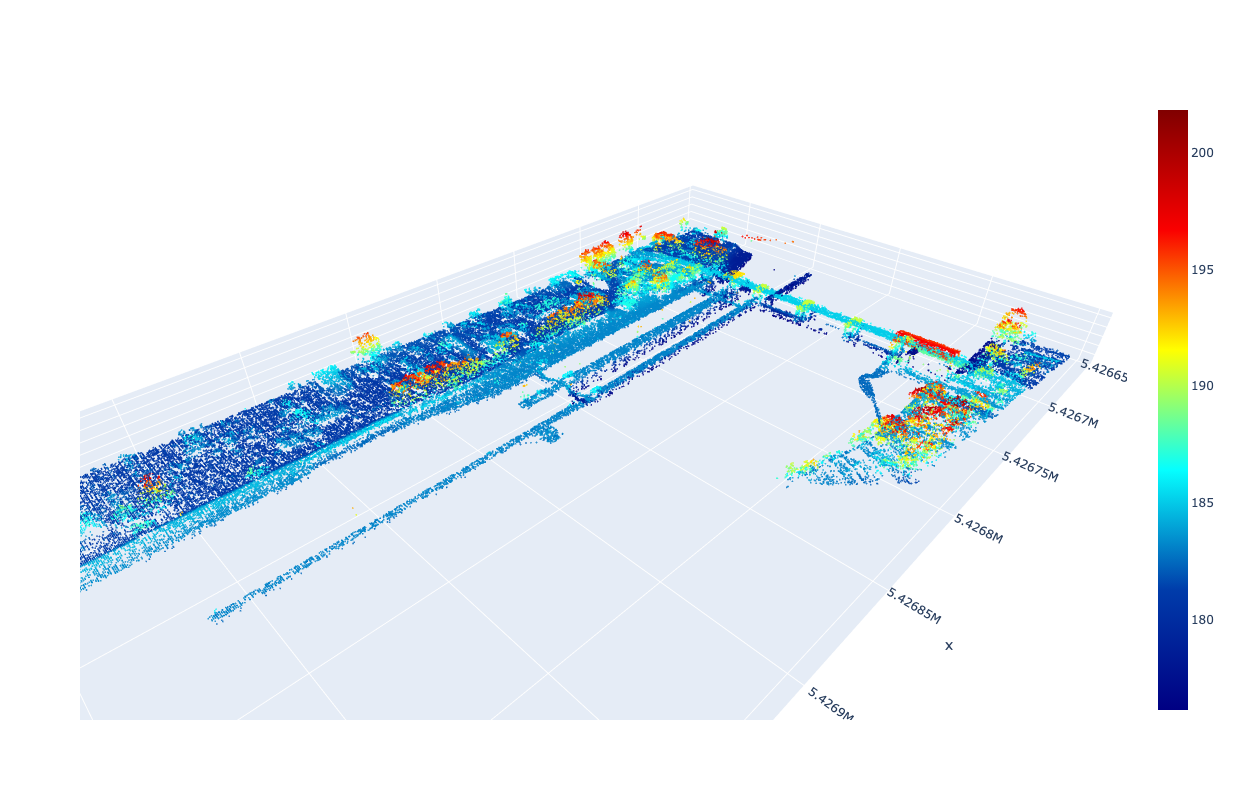

In [8]:
def visualize_pointcloud(laz_file_path, sample_size=None):
    """
    Read and visualize a LAZ/LAS point cloud file in 3D using PDAL.

    Args:
        laz_file_path (str): Path to the LAZ/LAS file
        sample_size (int, optional): Number of points to sample. Use None to plot all points.
    """

    # Create PDAL pipeline to read LAZ file
    pipeline = pdal.Pipeline(json.dumps({
        "pipeline": [
            laz_file_path
        ]
    }))

    # Execute pipeline
    pipeline.execute()

    # Get point cloud data
    arrays = pipeline.arrays[0]
    points = np.vstack((arrays['X'], arrays['Y'], arrays['Z'])).transpose()

    # colors = np.vstack((arrays['Red'], arrays['Green'], arrays['Blue'])).T
    # colors = colors / 65535  # LAS зберігає RGB як uint16, тому нормалізуємо

    # Sample points if specified
    if sample_size and sample_size < len(points):
        indices = np.random.choice(len(points), sample_size, replace=False)
        points = points[indices]

    # Create 3D scatter plot
    # fig = go.Figure(data=[go.Scatter3d(
    # x=points[:, 1],
    # y=points[:, 0],
    # z=points[:, 2],
    # mode='markers',
    # marker=dict(
    #     size=1,
    #     opacity=0.8,
    #     color=['rgb({},{},{})'.format(r*255, g*255, b*255) for r, g, b in colors],
    #     )
    # )])
    fig = go.Figure(data=[go.Scatter3d(
        x=points[:, 1],  
        y=points[:, 0],
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=1,
            opacity=0.8,
            color=points[:, 2],  # Color by z-value
            colorscale='jet',  # You can try other scales: 'plasma', 'turbo', etc
            showscale=True
        )
    )])

    fig.update_layout(
        scene=dict(
            aspectmode='data'
        ),
        width=1000,
        height=800
    )

    fig.show()

# run the code
visualize_pointcloud("lidar_files/1.las", sample_size=100000)